In [2]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HRDataset_v14.csv')
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
#Checking to see that the categorical values are consistent. 
#Looks like the HispanicLatino column needs to be fixed.
#There is 2 Data Analyst Positions, 1 has an extra space at the end.
#The Production Department has lots of spaces at the end.

cat_cols = ['Sex','MaritalDesc','CitizenDesc','HispanicLatino', 'RaceDesc','EmploymentStatus','PerformanceScore','Position','State','TermReason','Department','RecruitmentSource']

for i in cat_cols:
    unique = df[i].unique()
    print(i)
    print(unique)
    print('---------------------------------------------------------------------------')

Sex
['M ' 'F']
---------------------------------------------------------------------------
MaritalDesc
['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
---------------------------------------------------------------------------
CitizenDesc
['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
---------------------------------------------------------------------------
HispanicLatino
['No' 'Yes' 'no' 'yes']
---------------------------------------------------------------------------
RaceDesc
['White' 'Black or African American' 'Two or more races' 'Asian'
 'American Indian or Alaska Native' 'Hispanic']
---------------------------------------------------------------------------
EmploymentStatus
['Active' 'Voluntarily Terminated' 'Terminated for Cause']
---------------------------------------------------------------------------
PerformanceScore
['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
---------------------------------------------------------------------------
Position
['Product

In [6]:
#Here I am fixing the issues I found.

df['HispanicLatino'] = df['HispanicLatino'].str.capitalize()
df['Department'] = df['Department'].str.strip()
df['Position'] = df['Position'].str.strip()

In [7]:
#Creating a function to make the ID columns consistent with their descriptive columns.
#For example, all MaritalStatusID values should directly correlate with a MaritalDesc value.

def connect_id_desc(id_column, desc_column):
    for num, desc in enumerate(df[desc_column].unique()):
        df.loc[df[desc_column] == desc, id_column] = num

In [8]:
#Selecting the ID columns and Descriptive columns to put through the function to ensure they are all consistent.

id_cols = ['EmpID', 'MaritalStatusID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'PositionID', 'ManagerID', 'GenderID']
desc_cols = ['Employee_Name', 'MaritalDesc', 'EmploymentStatus', 'Department', 'PerformanceScore', 'Position', 'ManagerName', 'Sex']

for desc, ids in zip(desc_cols, id_cols):
    connect_id_desc(ids, desc)

In [9]:
#Converting all the ID columns to int64.

for i in id_cols:
    df[i] = df[i].astype('int64')

In [10]:
#Making sure all columns are the correct data type. DOB, DateofHire, DateofTermination, and LastPerformanceReview_Date all need to be converted to datetime.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [11]:
#Converting date columns to datetime datatype.

datetime_cols = ['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']

for i in datetime_cols:
    df[i] = pd.to_datetime(df[i])

C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_30172\2557357390.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i] = pd.to_datetime(df[i])


In [12]:
#Checking for any unusual values from the numeric columns. 
#The only strange thing that stands out to me is the 2073-12-08 DOB. I will also check the very high salary just to make sure its not a mistake. 

df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,DOB,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311,311,104,311.000000,311.000000,311.000000,311.000000,311,311.000000,311.000000
mean,155.000000,0.398714,0.823151,0.565916,0.385852,0.733119,1.022508,0.093248,69020.684887,0.334405,4.704180,6555.482315,2004-07-02 11:06:45.144694528,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,7.797428,4.110000,3.890675,1.218650,2017-09-10 21:17:56.527331072,0.414791,10.237942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45046.000000,0.000000,0.000000,1013.000000,1974-01-07 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,0.000000,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000
25%,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,55501.500000,0.000000,0.000000,1901.500000,1981-03-21 00:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,3.000000,3.690000,3.000000,0.000000,2016-03-19 12:00:00,0.000000,5.000000
50%,155.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,62810.000000,0.000000,2.000000,2132.000000,1986-06-06 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,8.000000,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000
75%,232.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,72036.000000,1.000000,9.000000,2355.000000,2051-01-29 00:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,11.000000,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000
max,310.000000,1.000000,4.000000,1.000000,2.000000,5.000000,3.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,2073-12-08 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,20.000000,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000
std,89.922189,0.490423,0.979258,0.496435,0.583918,1.306126,0.587072,0.291248,25156.636930,0.472542,6.828967,16908.396884,NaN,NaN,NaN,5.265297,0.789938,0.909241,2.349421,NaN,1.294519,5.852596


In [13]:
#Going to check that Performance Reviews happen before DateofTermination and after DateofHire, and that DateofHire happens before DateofTermination.

df.loc[(df['DateofHire'] > df['DateofTermination']) | (df['DateofHire'] > df['LastPerformanceReview_Date']) | (df['LastPerformanceReview_Date'] > df['DateofTermination'])]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
95,"Forrest, Alex",95,1,1,0,2,4,3,0,70187,1,11,Area Sales Manager,MA,2330,1975-07-07,M,Married,US Citizen,No,White,2014-09-29,2018-08-19,Fatal attraction,Terminated for Cause,Sales,Lynn Daneault,16,Employee Referral,PIP,2.00,5,0,2019-01-28,4,7
104,"Gill, Whitney",104,0,3,1,2,4,1,0,59370,1,11,Area Sales Manager,OH,43050,2071-07-10,F,Widowed,US Citizen,No,Black or African American,2014-07-07,2015-09-05,attendance,Terminated for Cause,Sales,John Smith,14,CareerBuilder,Fully Meets,3.97,4,0,2014-01-15,0,7
108,"Goble, Taisha",108,0,0,1,2,1,1,0,114800,1,6,Database Administrator,MA,2127,2071-10-23,F,Single,US Citizen,No,White,2015-02-16,2015-03-15,"no-call, no-show",Terminated for Cause,IT/IS,Simon Roup,1,Indeed,Fully Meets,4.60,4,4,2015-01-20,0,10


In [14]:
#For Index 108, the employee was only employeed for 2 days, so I am simply going to drop that value.
#For the other 2, I am going to assume that the LastPerformanceReview_Date was off by 1 year in both cases. I am not sure if this is the case, but I do not want to lose those values if I don't have to.

df.loc[95, 'LastPerformanceReview_Date'] = '2018-01-28' #Setting the LastPerformanceReview_Date to a year earlier.
df.loc[104, 'LastPerformanceReview_Date'] = '2015-01-15' #Setting the LastPerformanceReview_Date to a year later.
df.drop(108, axis=0, inplace=True) #Dropping this value.

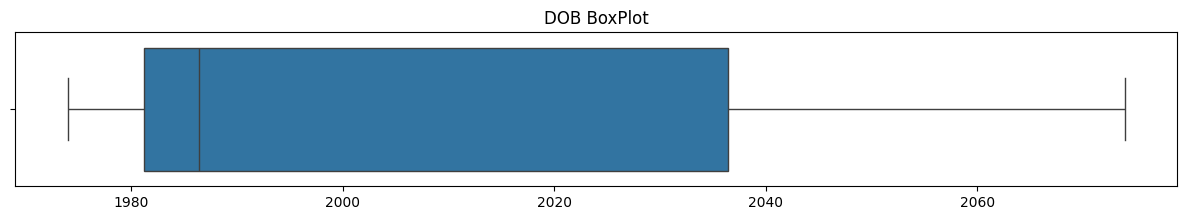

In [15]:
#Looking to see the distribution of DOB. Looks pretty bad!

fig, ax = plt.subplots(1, figsize=(15,2))

sns.boxplot(df['DOB'], orient='h')
plt.title('DOB BoxPlot')
plt.xlabel('')
plt.show()

In [16]:
#Assuming there are no 4 year olds working in this company, I am going to see what the minimum DOB is for when DOB is when DOB year is over 2020.

df.loc[df['DOB'] > '2020-01-01', 'DOB'].min()

Timestamp('2051-01-02 00:00:00')

In [17]:
#Now I am checking to see what the maximum year is for when DOB year is below 2020. From this, I am going to assume that this is the DOB of the youngest person at the company.

df.loc[df['DOB'] < '2020-01-01', 'DOB'].max()

Timestamp('1992-08-17 00:00:00')

In [18]:
#The mean DOB of those between the minimum DOB and the **assumed** actual maximum DOB (1992-08-17) is 1983-04-26.

df.loc[df['DOB'] < '2020-01-01', 'DOB'].mean()

Timestamp('1983-04-26 13:51:43.448275840')

In [19]:
#I will set the DOB outliers to this mean so as to not lose those data points.

df.loc[df['DOB'] > '2020-01-01', 'DOB'] = '1983-04-26'

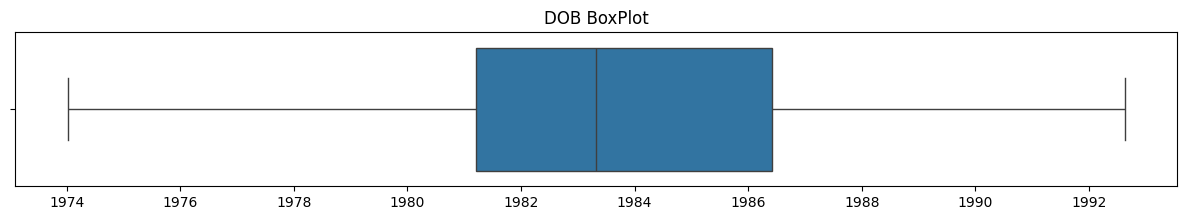

In [20]:
#This looks a lot better!

fig, ax = plt.subplots(1, figsize=(15,2))

sns.boxplot(df['DOB'], orient='h')
plt.title('DOB BoxPlot')
plt.xlabel('')
plt.show()

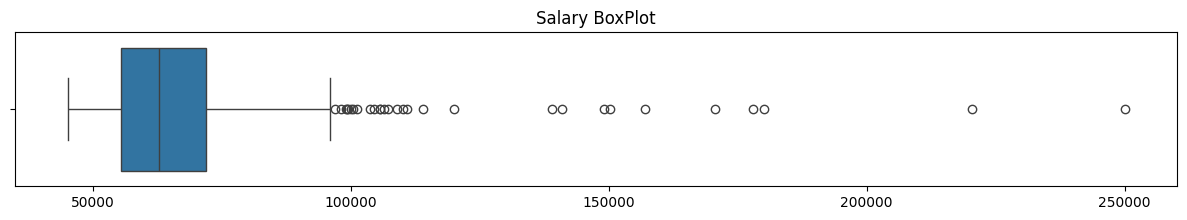

In [21]:
#Now I am going to check the salary distribution.

fig, ax = plt.subplots(1, figsize=(15,2))

sns.boxplot(df['Salary'], orient='h')
plt.title('Salary BoxPlot')
plt.xlabel('')
plt.show()

In [22]:
#Seeing if there is anything that is obviously strange.

q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)
IQR = q3 - q1

df.loc[(df['Salary'] > (q3 + 1.5*IQR))].head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",1,1,1,0,1,1,1,0,104437,1,1,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,1,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
18,"Becker, Renee",18,0,0,1,2,1,1,0,110000,1,6,Database Administrator,MA,2026,1986-04-04,F,Single,US Citizen,Yes,White,2014-07-07,2015-09-12,performance,Terminated for Cause,IT/IS,Simon Roup,1,Google Search,Fully Meets,4.50,4,5,2015-01-15,0,8
25,"Booth, Frank",25,0,0,0,2,1,1,0,103613,1,7,Enterprise Architect,CT,6033,1983-04-26,M,Single,US Citizen,No,Black or African American,2014-02-17,2016-02-19,Learned that he is a gangster,Terminated for Cause,IT/IS,Simon Roup,1,LinkedIn,Fully Meets,3.50,5,7,2016-01-10,0,2
26,"Boutwell, Bonalyn",26,1,1,1,0,3,1,1,106367,0,8,Sr. Accountant,MA,2468,1987-04-04,F,Married,US Citizen,No,Black or African American,2015-02-16,NaT,N/A-StillEmployed,Active,Admin Offices,Brandon R. LeBlanc,12,Diversity Job Fair,Fully Meets,5.00,4,3,2019-02-18,0,4
39,"Carr, Claudia N",39,0,0,1,0,1,1,0,100031,0,1,Sr. DBA,MA,1886,1986-06-06,F,Single,US Citizen,No,Black or African American,2016-06-30,NaT,N/A-StillEmployed,Active,IT/IS,Simon Roup,1,LinkedIn,Fully Meets,5.00,5,6,2019-02-18,0,7


In [23]:
#Going to make a copy of the dataframe to take a closer look at these high salaries without damaing the original data.

temp_df = df.copy()

In [24]:
#Removing all the salary outliers from the temporary dataframe.

rows_to_drop = df.loc[(df['Salary'] > (q3 + 1.5*IQR))].index

temp_df.drop(rows_to_drop, inplace=True)

In [25]:
#Going to see what the mean Salary is of the positions associated with the Salary outliers is (without the actual outliers).
#Seems to be that most of these positions are only found within the Salary outliers table.
#As for the positions that do exist, they high Salary seems to be consistent with the position.
#Because of these facts, I will keep the outliers Salaries as they are since they make sense in this context.

high_sal_positions = df.loc[(df['Salary'] > (q3 + 1.5*IQR)), 'Position'].unique()

for i in high_sal_positions:
    mean_sal = temp_df.loc[temp_df['Position'] == i, 'Salary'].mean()
    print(f'The mean Salary of {i} is {mean_sal}')

The mean Salary of Sr. DBA is nan
The mean Salary of Database Administrator is nan
The mean Salary of Enterprise Architect is nan
The mean Salary of Sr. Accountant is nan
The mean Salary of BI Director is nan
The mean Salary of Director of Operations is nan
The mean Salary of Software Engineer is 90324.4
The mean Salary of BI Developer is 93010.0
The mean Salary of IT Manager - Support is nan
The mean Salary of IT Director is nan
The mean Salary of Director of Sales is nan
The mean Salary of President & CEO is nan
The mean Salary of IT Manager - Infra is nan
The mean Salary of Principal Data Architect is nan
The mean Salary of Data Architect is nan
The mean Salary of IT Manager - DB is nan
The mean Salary of Sr. Network Engineer is 89532.0
The mean Salary of CIO is nan


In [26]:
#Checking for any duplicate values.

df.duplicated().sum()

0

In [27]:
#Checking for any null values.

for i in df:
    if df[i].isna().sum() > 0:
        num = df[i].isna().sum()
        print(f'{i} has {num} null values')

DateofTermination has 207 null values


In [28]:
#Looks like DateofTermination NaT values means the employee is still working at the company. However, I would like to change the TermReason to be a Null value instead of what it is now.

df.loc[df['DateofTermination'].isna()].head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",0,0,0,0,0,0,0,0,62506,0,0,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
3,"Alagbe,Trina",3,1,1,1,0,0,1,0,64991,0,0,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,3,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
5,"Anderson, Linda",5,0,0,1,0,0,0,0,57568,0,0,Production Technician I,MA,1844,1977-05-22,F,Single,US Citizen,No,White,2012-01-09,NaT,N/A-StillEmployed,Active,Production,Amy Dunn,5,LinkedIn,Exceeds,5.00,5,0,2019-01-07,0,15
6,"Andreola, Colby",6,0,0,1,0,2,1,0,95660,0,3,Software Engineer,MA,2110,1979-05-24,F,Single,US Citizen,No,White,2014-11-10,NaT,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,6,LinkedIn,Fully Meets,3.04,3,4,2019-01-02,0,19
7,"Athwal, Sam",7,0,3,0,0,0,1,0,59365,0,0,Production Technician I,MA,2199,1983-02-18,M,Widowed,US Citizen,No,White,2013-09-30,NaT,N/A-StillEmployed,Active,Production,Ketsia Liebig,7,Employee Referral,Fully Meets,5.00,4,0,2019-02-25,0,19


In [29]:
#Converting all TermReason to None where employee was not terminated.

df.loc[df['TermReason'].str.contains('N/A'), 'TermReason'] = None

In [30]:
#I feel comfortable with the state of the dataframe as it is. Now I will select the columns I am going to use for EDA and save it as a CSV.

cols_to_drop = ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID','EmpStatusID', 'DeptID', 'PerfScoreID','PositionID','ManagerID',]
eda_df = df.drop(columns=cols_to_drop)

eda_df.to_csv('cleaned_df.csv')

In [31]:
#Now, I will seperate the dataset to represent a relational database. Below is what I want tables I want and how I want them to be related.

#Manager Table: ManagerID (PK), ManagerName, DeptID (FK), 
#Department Table: DeptID (PK), Department
#Marital Status Table: MaritalStatusID (PK), MaritalDesc
#Position Table: PositionID (PK), Position
#Employee Table: EmpID (PK), Employee_Name, MaritalStatusID (FK), Sex, EmploymentStatus, DeptID (FK), FromDiversityJobFairID, Salary, PositionID (FK), State, Zip, DOB, CitizenDesc, 
#                 HispanicLatino, RaceDesc, DateofHire, DateofTermination, TermReason, EmploymentStatus, ManagerID (FK), RecruitmentSource, PerformanceScore, EngagementSurvey, 
#                 EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences

In [32]:
#Seperating the data into their respective SQL tables and dropping duplicates for later upload.

Manager_table = df[['ManagerID','ManagerName']]
Manager_table.drop_duplicates(inplace=True)

Department_table = df[['DeptID','Department']]
Department_table.drop_duplicates(inplace=True)

Marital_Status_table = df[['MaritalStatusID','MaritalDesc']]
Marital_Status_table.drop_duplicates(inplace=True)

Position_table = df[['PositionID','Position']]
Position_table.drop_duplicates(inplace=True)

Employee_table = df[['EmpID','Employee_Name','MaritalStatusID','Sex','EmploymentStatus','DeptID','FromDiversityJobFairID','Salary','PositionID','State','Zip','DOB','CitizenDesc','HispanicLatino','RaceDesc','DateofHire', 'Termd','DateofTermination','TermReason','ManagerID','RecruitmentSource','PerformanceScore','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','LastPerformanceReview_Date','DaysLateLast30','Absences']]
Employee_table.drop_duplicates(inplace=True)

C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_30172\2518909100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Manager_table.drop_duplicates(inplace=True)
C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_30172\2518909100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Department_table.drop_duplicates(inplace=True)
C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_30172\2518909100.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [33]:
#Saving all tables to a CSV in the SQL tables folder.

Manager_table.to_csv(r'C:\Users\Thomas Campana\VisualStudioTests\DATA_SCIENCE\HR_Project\sql_tables_transfer\manager_df.csv')
Department_table.to_csv(r'C:\Users\Thomas Campana\VisualStudioTests\DATA_SCIENCE\HR_Project\sql_tables_transfer\department.csv')
Marital_Status_table.to_csv(r'C:\Users\Thomas Campana\VisualStudioTests\DATA_SCIENCE\HR_Project\sql_tables_transfer\marital.csv')
Position_table.to_csv(r'C:\Users\Thomas Campana\VisualStudioTests\DATA_SCIENCE\HR_Project\sql_tables_transfer\position.csv')
Employee_table.to_csv(r'C:\Users\Thomas Campana\VisualStudioTests\DATA_SCIENCE\HR_Project\sql_tables_transfer\employee.csv')